# **COMPARATIVE CLASSIFICATION OF QUALITATIVE AND QUANTITATIVE FEATURES OF SONGS AND VISUALIZATION OF FEATURES**

# **SUBMITTED BY:**
# SIDDHARTH THAKUR - 20BCE1144

# IMPORTING PACKAGES AND DATASET

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
data_frame = pd.read_csv("song.csv")

In [2]:
data_frame.columns

Index(['id', 'name', 'duration_ms', 'artists', 'release_date', 'danceability',
       'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'liveness', 'valence', 'tempo', 'time_signature', 'popularity', 'like'],
      dtype='object')

In [3]:
Features = ['duration_ms', 'release_date', 'danceability', 'energy']
Target = ["like"]

In [4]:
#Split dataset to Training Set & Test Set
from sklearn.model_selection import train_test_split

X = data_frame[Features]
y = data_frame[Target]

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                        train_size = 0.8, 
                        test_size = 0.2, 
                        random_state= 10)



x1 = X_train[Features]    #Features to train
x2 = y_train[Target]      #Target Class to test
y1 = X_test[Features]    #Features to test
y2 = y_test[Target]      #Target Class to test

In [5]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
best_features= SelectKBest(score_func=chi2, k=3)
fit= best_features.fit(X,y)

In [6]:
df_scores= pd.DataFrame(fit.scores_*100)
df_columns= pd.DataFrame(X.columns)

In [7]:
features_scores= pd.concat([df_columns, df_scores], axis=1)
features_scores.columns= ['Features', 'Score']
features_scores.sort_values(by = 'Score')

,Features,Score
2,danceability,1.468512e-01
3,energy,1.375240e+01
1,release_date,6.499554e+01
0,duration_ms,4.182535e+06


In [8]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import tree
import graphviz 
from matplotlib import pyplot as plt

# DECISION TREE CLASSIFICATION FOR QUALITATIVE FEATURES

In [9]:
# create a DecisionTreeClassifier object
clf = DecisionTreeClassifier(random_state=10)

# fit the model to the data
clf.fit(X_train, y_train)

# make predictions on the test set
result = clf.predict(X_test)

In [10]:
# Model Evaluation
from yellowbrick.classifier import ClassificationReport
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score

In [25]:
ac_sc = accuracy_score(y2, result)
rc_sc = recall_score(y2, result, average="weighted")
pr_sc = precision_score(y2, result, average="weighted")
f1_sc = f1_score(y2, result, average='micro')
confusion_m = confusion_matrix(y2, result)
print("========== Decision Tree Results ==========")
print("Accuracy    : ", ac_sc)
print("Recall      : ", rc_sc)
print("Precision   : ", pr_sc)
print("F1 Score    : ", f1_sc)


========== Decision Tree Results ==========
Accuracy    : 0.9000664687375371
Recall      : 0.9000664687375371
Precision   : 0.9002145364550091
F1 Score    : 0.9000664687375371


In [13]:
from sklearn import tree
textrepresentation = tree.export_text(clf)
print(textrepresentation)

|--- feature_3 <= 0.88
|   |--- feature_2 <= 0.98
|   |   |--- feature_2 <= 0.72
|   |   |   |--- feature_3 <= 0.88
|   |   |   |   |--- feature_0 <= 43680.00
|   |   |   |   |   |--- feature_2 <= 0.62
|   |   |   |   |   |   |--- feature_2 <= 0.17
|   |   |   |   |   |   |   |--- feature_0 <= 39862.00
|   |   |   |   |   |   |   |   |--- feature_0 <= 37087.00
|   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |--- feature_0 >  37087.00
|   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |--- feature_0 >  39862.00
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- feature_2 >  0.17
|   |   |   |   |   |   |   |--- feature_0 <= 34653.00
|   |   |   |   |   |   |   |   |--- feature_1 <= 1960.50
|   |   |   |   |   |   |   |   |   |--- feature_0 <= 34420.00
|   |   |   |   |   |   |   |   |   |   |--- feature_1 <= 1940.00
|   |   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   | 

In [15]:
#feature scaling
from sklearn.preprocessing import StandardScaler
sc_X=StandardScaler()
X_train=sc_X.fit_transform(X_train)
X_test=sc_X.transform(X_test)

In [16]:
#### logistic regression

#fitting LR to training set

from sklearn.linear_model import LogisticRegression
classifier =LogisticRegression()
classifier.fit(X_train, y_train)

#Predict the test set results

result=classifier.predict(X_test)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [22]:
ac_sc = accuracy_score(y2, result)
rc_sc = recall_score(y2, result, average="weighted")
pr_sc = precision_score(y2, result, average="weighted")
f1_sc = f1_score(y2, result, average='micro')
confusion_m = confusion_matrix(y2, result)
print("========== Logistic Regression Results ==========")
print("Accuracy    : ", ac_sc)
print("Recall      : ", rc_sc)
print("Precision   : ", pr_sc)
print("F1 Score    : ", f1_sc)

========== Logistic Regression Results ==========
Accuracy    : 0.9117649669440688
Recall      : 0.9117649669440688
Precision   : 0.76190338098189184
F1 Score    : 0.9117649665440688


In [20]:
from sklearn.ensemble import RandomForestClassifier,VotingClassifier
rf_model = RandomForestClassifier(n_estimators=100, # Number of trees
                                  min_samples_split = 30,
                                  bootstrap = True, 
                                  max_depth = 50, 
                                  min_samples_leaf = 25)

# Model Training
rf_model.fit(X=x1,
             y=x2)

# Prediction
result = rf_model.predict(y1)

<ipython-input-20-9a3d2a277d28>:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model.fit(X=x1,


In [27]:
ac_sc = accuracy_score(y2, result)
rc_sc = recall_score(y2, result, average="weighted")
pr_sc = precision_score(y2, result, average="weighted")
f1_sc = f1_score(y2, result, average='micro')
confusion_m = confusion_matrix(y2, result)
print("========== Random Forest Results ==========")

print("Accuracy    : ", ac_sc)
print("Recall      : ", rc_sc)
print("Precision   : ", pr_sc)
print("F1 Score    : ", f1_sc)


========== Random Forest Results ==========
Accuracy    :  0.8982939690698808
Recall      :  0.8982939690698808
Precision   :  0.897042337544957
F1 Score    :  0.8982939690698808


In [ ]:
from sklearn import tree
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=800)
tree.plot_tree(rf_model.estimators_[99],
               filled = True);
fig.savefig('rf_individualtree.png')

In [29]:
# K-Nearest Neighbors
# Create Model with configuration 
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=3)

# Model Training
knn_model.fit(X=x1,
             y=x2)

# Prediction
result = knn_model.predict(y1) 

/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [43]:
ac_sc = accuracy_score(y2, result)
rc_sc = recall_score(y2, result, average="weighted")
pr_sc = precision_score(y2, result, average="weighted")
f1_sc = f1_score(y2, result, average='micro')
confusion_m = confusion_matrix(y2, result)
print("========== KNN Results ==========")
print("Accuracy    : ", ac_sc)
print("Recall      : ", rc_sc)
print("Precision   : ", pr_sc)
print("F1 Score    : ", f1_sc)

========== KNN Results ==========
Accuracy    : 0.89754065671112685
Recall      : 0.89754065671112685
Precision   : 0.8976546591809232
F1 Score    : 0.89754065671112685


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
error_rates = []

for i in np.arange(1, 10):

    new_model = KNeighborsClassifier(n_neighbors = i)

    new_model.fit(X_train, y_train)

    new_predictions = new_model.predict(X_train)

    error_rates.append(np.mean(new_predictions != result))

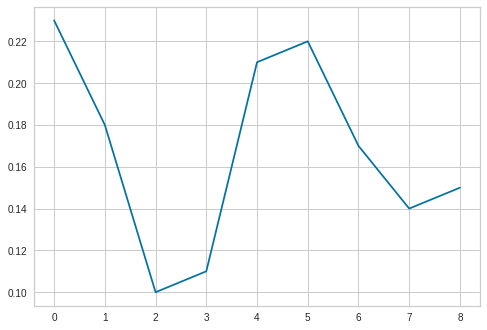

In [40]:
plt.plot(error_rates)

In [41]:
# Neural Network
# Create Model with configuration 
from sklearn.neural_network import MLPClassifier
nn_model = MLPClassifier(solver='adam', 
                         alpha=1e-5,
                         hidden_layer_sizes=(40,), 
                         random_state=1,
                         max_iter=1000                         
                        )

# Model Training
nn_model.fit(X=x1,
             y=x2)

# Prediction
result = nn_model.predict(y1) 

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1096: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [44]:
# Model Evaluation
ac_sc = accuracy_score(y2, result)
rc_sc = recall_score(y2, result, average="weighted")
pr_sc = precision_score(y2, result, average="weighted")
f1_sc = f1_score(y2, result, average='micro')
confusion_m = confusion_matrix(y2, result)

print("========== Neural Network Results ==========")
print("Accuracy    : ", ac_sc)
print("Recall      : ", rc_sc)
print("Precision   : ", pr_sc)
print("F1 Score    : ", f1_sc)


========== Neural Network Results ==========
Accuracy    : 0.882350334559312
Recall      : 0.8882350334559312
Precision   : 0.7383734478937143
F1 Score    : 0.8882350334559312


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [45]:
# Ensemble Voting Model
# Combine 3 Models to create an Ensemble Model
# Create Model with configuration
eclf1 = VotingClassifier(estimators=[('knn', knn_model), ('rf', rf_model), ('nn', nn_model)], 
                         weights=[1,1,1],
                         flatten_transform=True)
eclf1 = eclf1.fit(X=x1, y=x2)   

# Prediction
result = eclf1.predict(y1)

/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


In [47]:
# Model Evaluation
ac_sc = accuracy_score(y2, result)
rc_sc = recall_score(y2, result, average="weighted")
pr_sc = precision_score(y2, result, average="weighted")
f1_sc = f1_score(y2, result, average='micro')
confusion_m = confusion_matrix(y2, result)

print("========== Voting Model Results ==========")
print("Accuracy    : ", ac_sc)
print("Recall      : ", rc_sc)
print("Precision   : ", pr_sc)
print("F1 Score    : ", f1_sc)

========== Voting Model Results ==========
Accuracy    : 0.8917357202995524
Recall      : 0.8917357202995524
Precision   : 0.8962233913737129
F1 Score    : 0.8917357202995524


In [51]:
from keras.models import Sequential
from keras.layers import Dense
# create the ANN model
model = Sequential()
model.add(Dense(8, input_dim=4, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# compile the model
model.compile(loss='binary_crossentropy', optimizer='adam')

# train the model
model.fit(X_train, y_train, epochs=100, batch_size=100)

# evaluate the model on the testing set
accuracy = model.evaluate(X_test, y_test)
print('Accuracy: %.2f' % (accuracy*100))

Epoch 1/100
903/903 [==============================] - 6s 5ms/step - loss: 0.6995
Epoch 2/100
903/903 [==============================] - 2s 2ms/step - loss: 0.6935
Epoch 3/100
903/903 [==============================] - 2s 2ms/step - loss: 0.6932
Epoch 4/100
903/903 [==============================] - 2s 2ms/step - loss: 0.6931
Epoch 5/100
903/903 [==============================] - 2s 2ms/step - loss: 0.6931
Epoch 6/100
903/903 [==============================] - 2s 2ms/step - loss: 0.6931
Epoch 7/100
903/903 [==============================] - 3s 3ms/step - loss: 0.6931
Epoch 8/100
903/903 [==============================] - 2s 2ms/step - loss: 0.6930
Epoch 9/100
903/903 [==============================] - 2s 2ms/step - loss: 0.6930
Epoch 10/100
903/903 [==============================] - 2s 2ms/step - loss: 0.6930
Epoch 11/100
903/903 [==============================] - 2s 2ms/step - loss: 0.6930
Epoch 12/100
903/903 [==============================] - 2s 3ms/step - loss: 0.6930
Epoch 13/100
